In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [209]:
df = pd.read_csv('Churn_final_data.csv')
df.head(10)

,CustomerID,Churn,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,3.0,3,2,1,11.0,1.0,5.0,160
1,50002,1,3.0,4,3,1,15.0,1.0,0.0,121
2,50003,1,2.0,4,3,1,14.0,1.0,3.0,120
3,50004,1,2.0,4,5,0,23.0,1.0,3.0,134
4,50005,1,NaN,3,5,0,11.0,1.0,3.0,130
5,50006,1,3.0,5,5,1,22.0,6.0,7.0,139
6,50007,1,2.0,3,2,0,14.0,1.0,0.0,121
7,50008,1,3.0,3,2,1,16.0,2.0,0.0,123
8,50009,1,NaN,4,3,1,14.0,1.0,2.0,127
9,50010,1,2.0,5,3,0,12.0,1.0,1.0,123


In [210]:
df.dtypes

CustomerID                       int64
Churn                            int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [211]:
df["HourSpendOnApp"] = df["HourSpendOnApp"].replace(np.NaN,df["HourSpendOnApp"].mean())
df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].replace(np.NaN,df["OrderAmountHikeFromlastYear"].mean())
df["OrderCount"] = df["OrderCount"].replace(np.NaN,df["OrderCount"].mean())
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].replace(np.NaN,df["DaySinceLastOrder"].mean())

In [111]:
print(df["HourSpendOnApp"].isnull().sum())
print(df["SatisfactionScore"].isnull().sum())
print(df["Complain"].isnull().sum())
print(df["OrderAmountHikeFromlastYear"].isnull().sum())
print(df["OrderCount"].isnull().sum())
print(df["DaySinceLastOrder"].isnull().sum())
print(df["CashbackAmount"].isnull().sum())

0
0
0
0
0
0
0


In [212]:
df.head()

,CustomerID,Churn,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,3.000000,3,2,1,11.0,1.0,5.0,160
1,50002,1,3.000000,4,3,1,15.0,1.0,0.0,121
2,50003,1,2.000000,4,3,1,14.0,1.0,3.0,120
3,50004,1,2.000000,4,5,0,23.0,1.0,3.0,134
4,50005,1,2.931535,3,5,0,11.0,1.0,3.0,130


<AxesSubplot:>

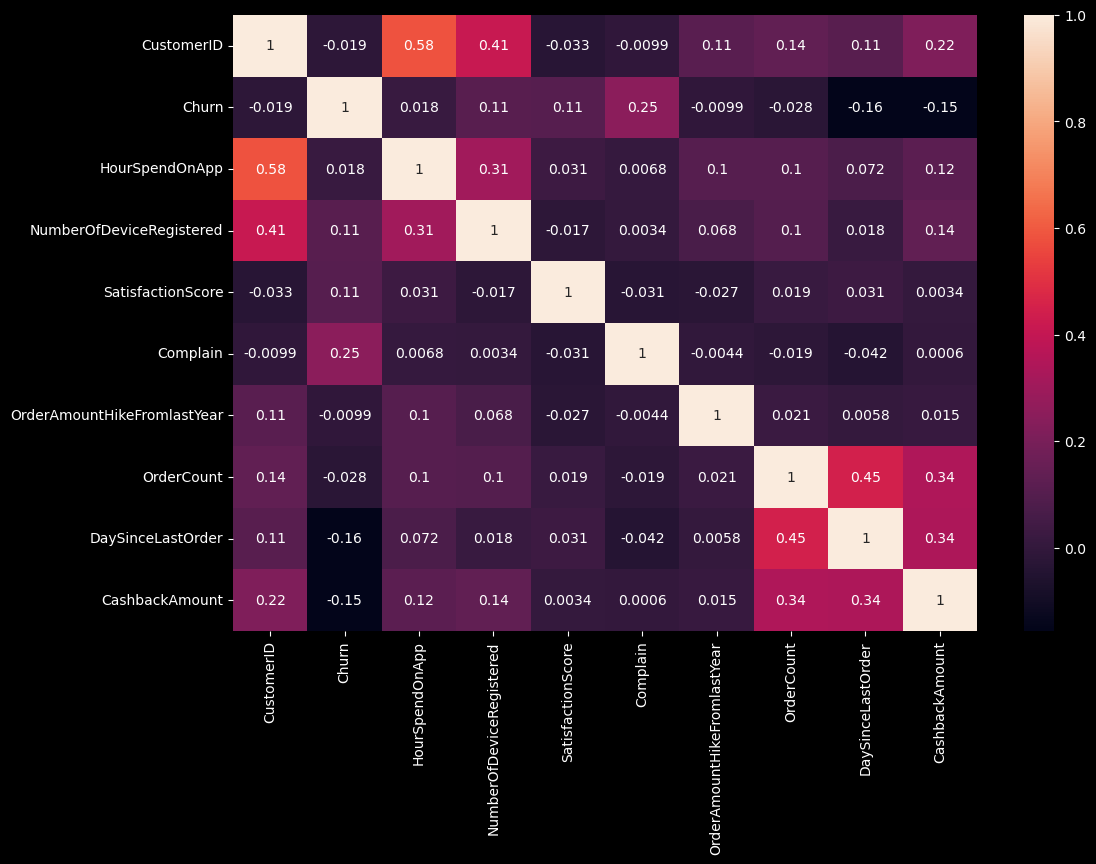

In [213]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [214]:
df.duplicated().sum()

0

In [215]:
churn = df['Churn'].unique()
print(len(churn))
print(churn)
print(pd.value_counts(df['Churn']))

2
[1 0]
0    4682
1     948
Name: Churn, dtype: int64


0    4682
1     948
Name: Churn, dtype: int64


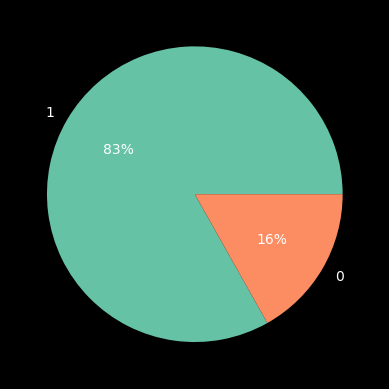

In [216]:
import matplotlib.pyplot as plt
churn=df['Churn'].unique()
count=pd.value_counts(df['Churn'])
print(count)
plt.pie(count,labels=churn,autopct='%d%%')
plt.show()

In [247]:
# print(df.size)
# print(df.describe())

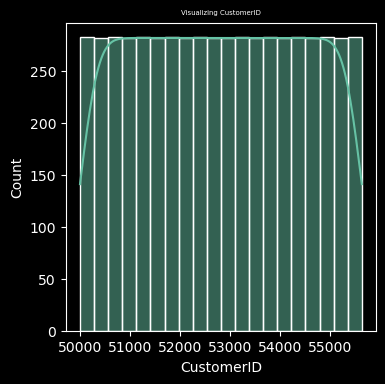

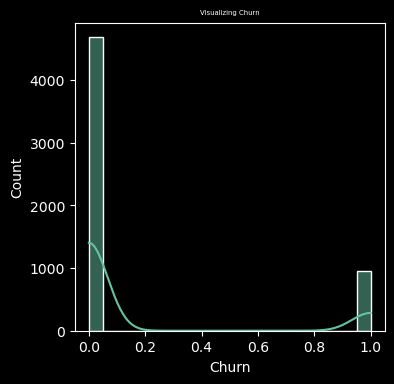

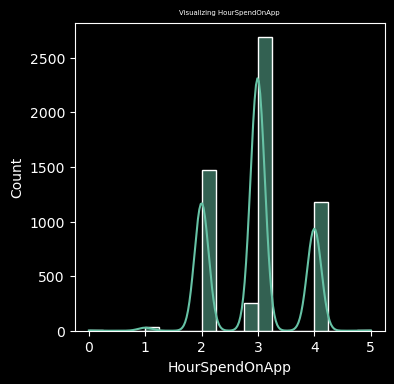

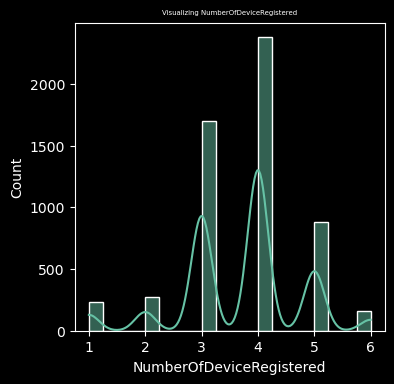

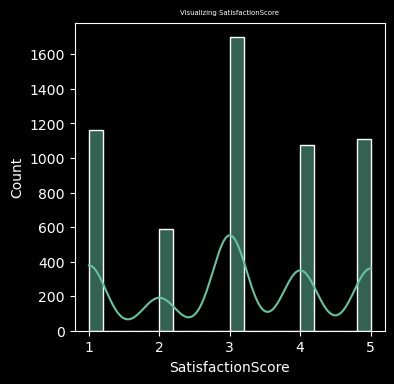

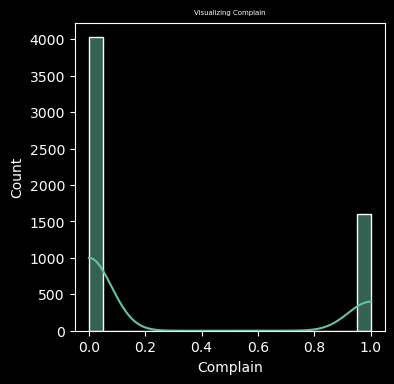

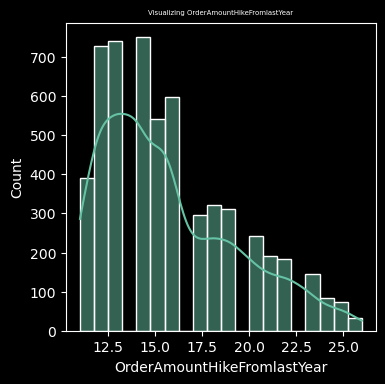

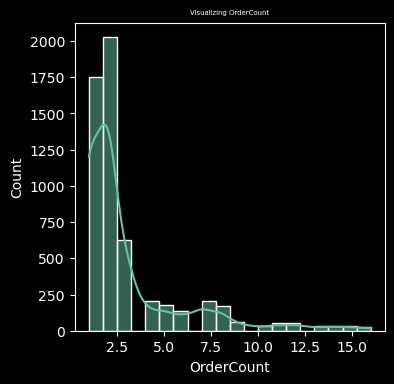

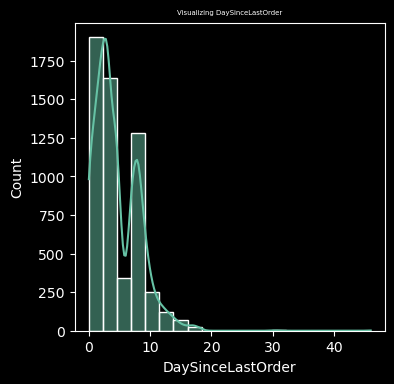

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
sns.set_palette("Set2")

for i in df.columns[:-1]:
    plt.figure(figsize=(4, 4))
    sns.histplot(data=df, x=i, kde=True, bins=20)
    plt.title(f'Visualizing {i}', size=5)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [258]:
features = df[['CustomerID','HourSpendOnApp','SatisfactionScore','Complain','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']]

In [259]:
target = df['Churn']
labels = df['Churn']

In [260]:
acc=[]
model = []

In [261]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,random_state=42,test_size=0.3)

In [262]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain)
ypred = lm.predict(xtest)
print(ypred)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
RMSE = np.sqrt(mse)
print("RMSE value : {:.4f}".format(RMSE))
acc.append(RMSE)
model.append("LinearRegression")
# sns.heatmap(mse,annot = True)

[0.25977945 0.28878621 0.25225535 ... 0.38911877 0.12536291 0.38076747]
RMSE value : 0.3494


In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)
dt.fit(xtrain,ytrain)

predicted_values = dt.predict(xtest)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('dt')
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

DecisionTrees's Accuracy is:  0.8436944937833037
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1414
           1       0.57      0.17      0.26       275

    accuracy                           0.84      1689
   macro avg       0.71      0.57      0.59      1689
weighted avg       0.81      0.84      0.81      1689



              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1414
           1       0.74      0.34      0.47       275

    accuracy                           0.87      1689
   macro avg       0.81      0.66      0.70      1689
weighted avg       0.86      0.87      0.85      1689

RF's Accuracy is:  0.8732978093546477


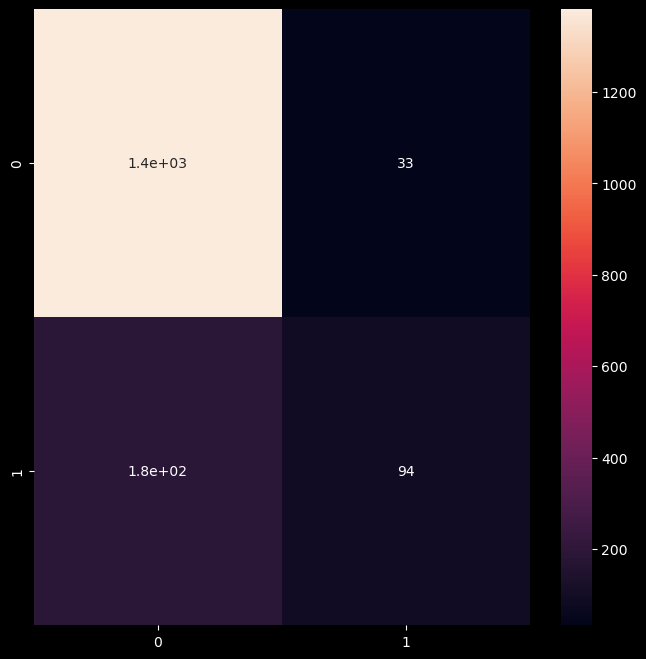

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(xtrain,ytrain)

confusion_RF=confusion_matrix(ytest,RF.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_RF,annot=True)
from sklearn.metrics import classification_report
print(classification_report(ytest,RF.predict(xtest)))
predicted_values = RF.predict(xtest)

x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

In [265]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
predicted_values = SVM.predict(x_test_norm)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

SVM's Accuracy is:  0.8389579632918887
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1414
           1       0.56      0.05      0.10       275

    accuracy                           0.84      1689
   macro avg       0.70      0.52      0.51      1689
weighted avg       0.80      0.84      0.78      1689



In [266]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(xtrain,ytrain)

predicted_values = LogReg.predict(xtest)

x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('LR')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8348134991119005
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1414
           1       0.00      0.00      0.00       275

    accuracy                           0.83      1689
   macro avg       0.42      0.50      0.45      1689
weighted avg       0.70      0.83      0.76      1689



              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1414
           1       0.72      0.23      0.34       275

    accuracy                           0.86      1689
   macro avg       0.79      0.60      0.63      1689
weighted avg       0.84      0.86      0.83      1689

Gradient boost accuracy is :  0.8596802841918295
 


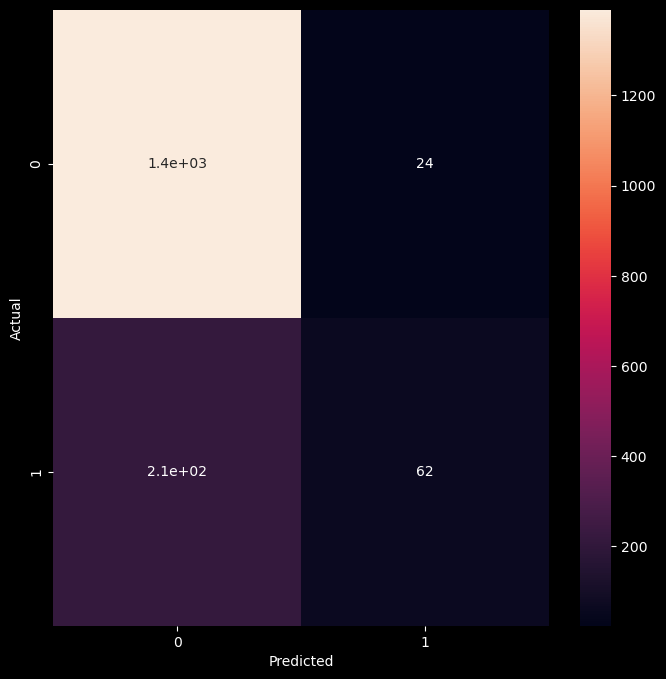

In [267]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(xtrain,ytrain)
y_pred_gbc=gbc.predict(xtest)
confusion_gbc=confusion_matrix(ytest,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
x = metrics.accuracy_score(ytest, y_pred_gbc)
acc.append(x)
model.append('Gradient Boost')
print(classification_report(ytest,y_pred_gbc))
print("Gradient boost accuracy is : ",x)
print(" ")

C:\Users\Rasagna Balabhadra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1414
           1       0.26      0.25      0.25       275

    accuracy                           0.76      1689
   macro avg       0.56      0.55      0.55      1689
weighted avg       0.76      0.76      0.76      1689

Knn's Accuracy is : 0.7590290112492599
 


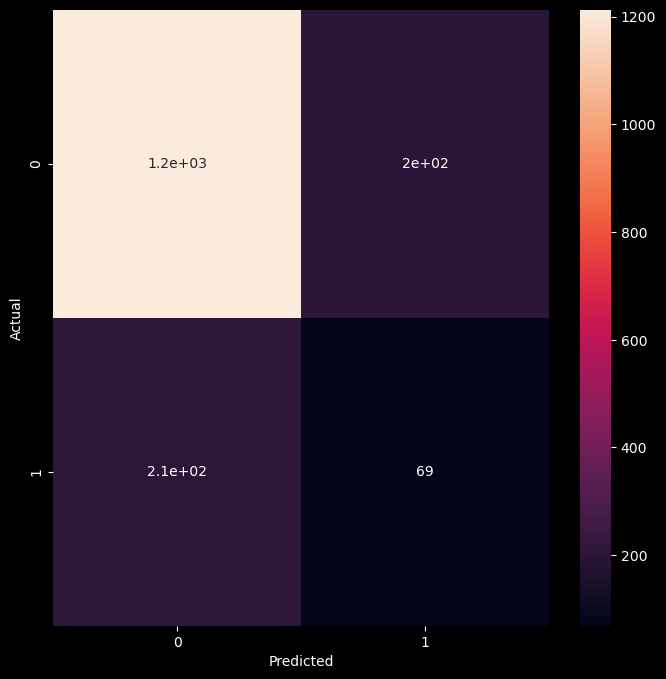

In [268]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)  # Predict the values for the test set

confusion_knn = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_knn, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(ytest, y_pred))

accuracy = accuracy_score(ytest, y_pred)
acc.append(accuracy)
model.append('Knn')
print("Knn's Accuracy is :",accuracy)
print(" ")


In [269]:
data = np.array([[50001,3.0,2,1,11.0,1.0,5.0,160]])
prediction = RF.predict(data)
print(prediction)

[1]


C:\Users\Rasagna Balabhadra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [270]:
data = np.array([[55621,4.0,5,0,15.0,2.0,5.0,163]])
prediction = RF.predict(data)
print(prediction)

[0]


C:\Users\Rasagna Balabhadra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [271]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
# data = pd.read_csv('churn_final_data.csv')
# print(data.head())
# Split the dataset into input features (X) and target variable (y)
X = df[['CustomerID','HourSpendOnApp','SatisfactionScore','Complain','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']]
y = df['Churn']

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X, y)

def churn_rate(input_data):
    # Create a DataFrame with the input parameters
    input_df = pd.DataFrame([input_data],columns=['CustomerID','HourSpendOnApp','SatisfactionScore','Complain','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount'])

    # Make predictions on the input data
    churn_result = clf.predict(input_df)

    return churn_result[0]

# Example usage
input_values = [50001,3.0,2,1,11.0,1.0,5.0,160]
rate_churn = churn_rate(input_values)
print("churn:", rate_churn)


churn: 1


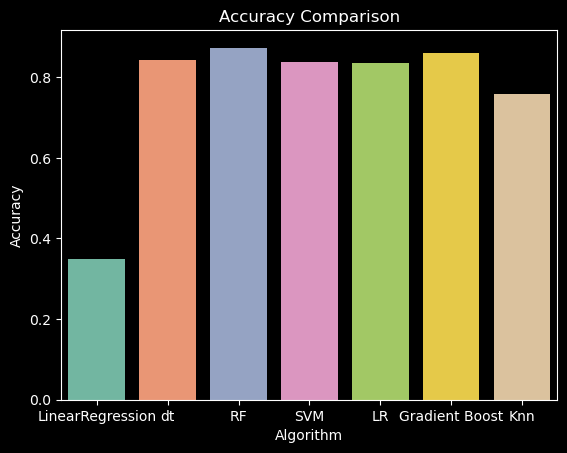

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=[6, 5])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.barplot(x = model, y = acc)
plt.show()

In [273]:
print(model,acc)

['LinearRegression', 'dt', 'RF', 'SVM', 'LR', 'Gradient Boost', 'Knn'] [0.34943349873186286, 0.8436944937833037, 0.8732978093546477, 0.8389579632918887, 0.8348134991119005, 0.8596802841918295, 0.7590290112492599]
